In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('datasets/titanic/train.csv')

#Basic details about data
print("Dimensions of the data", df.shape)
#There are 891 rows and 12 columns

#Name of the columns
print("\nNames of the columns in Titanic Data", df.columns)

a=df[df.isnull()==False]
a.shape #Looks like there is no missing data

a = df["Pclass"].isnull().value_counts()
type(a)
print(a)
#print("Number of non null entries in PClass:")


#Passengers survived in each class

#Group by PCClass and count the number of passenger Ids
total_passengers = df.groupby('Pclass')["PassengerId"].count()
print("Total Passengers on board:", total_passengers)

#Number of survivors in each class
#survivors = df.groupby('Pclass')['Survived'].count()
#cannot use the above, because that just counts the number of people in the
#survival list.
#in this case, survived  = 1, not survived =0. We just need sum of survived

survivors = df.groupby('Pclass')['Survived'].sum()
print("Survivors: ", survivors)

#Survivor percentage
survivor_percent = survivors/total_passengers


Dimensions of the data (891, 12)

Names of the columns in Titanic Data Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
False    891
Name: Pclass, dtype: int64
Total Passengers on board: Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64
Survivors:  Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


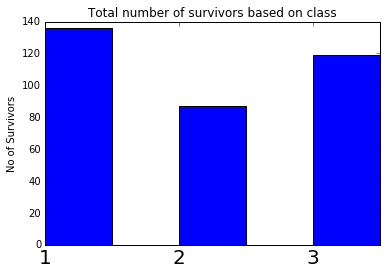

In [51]:
#Plotting the total number of survivors
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(), survivors, color ="b",
             width= 0.5)
ax.set_ylabel("No of Survivors")
ax.set_title("Total number of survivors based on class")
xTickmarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickmarks)
plt.setp(xtickNames, fontsize = 20)
plt.show()

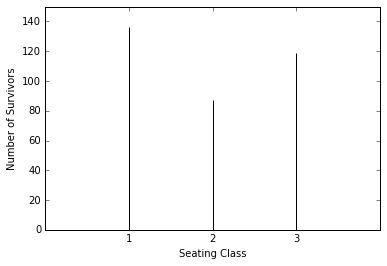

In [54]:
#Same thing as above with bit different syntax
fig,ax  = plt.subplots(1,1)
x = survivors.index.values.tolist()
ax.vlines(x,0,survivors)
plt.axis([0,4,0,150])
plt.xlabel("Seating Class")
plt.ylabel("Number of Survivors")
ax.set_xticks(survivors.index.values.tolist())


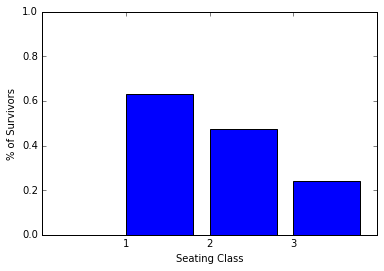

In [59]:
fig,ax  = plt.subplots(1,1)
x = survivors.index.values.tolist()
ax.bar(x,survivor_percent)
plt.axis([0,4,0,1])
plt.xlabel("Seating Class")
plt.ylabel("% of Survivors")
ax.set_xticks(survivors.index.values.tolist())

In [60]:
#Conclusions:
#Graph shows that 60% of 1st class, 50% of 2nd class and 25% of 3rd class
#passengers survived

Number of male passengers = 577 Number of female passengers = 314
Number of male survivors = 109, Number of female survivors = 233


<Container object of 2 artists>

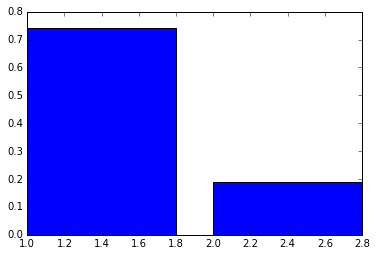

In [102]:
#What is the distribution of survivors based on gender
gender_dist = df.groupby("Sex")["PassengerId"].count()
print("Number of male passengers = %i Number of female passengers = %i"
      %(gender_dist.male,gender_dist.female))

gender_survival= df.groupby("Sex")["Survived"].sum()
print("Number of male survivors = %i, Number of female survivors = %i"
     %(gender_survival.male, gender_survival.female))

gender_survival_ratio = gender_survival/gender_dist
gender_survival_ratio
fig,ax = plt.subplots(1,1)
#x = gender_survival.index.values.tolist() #Doesnt work, looks like
                        # x has to be numbers
x = (1,2)
ax.bar(x,gender_survival_ratio)


In [141]:
#Books method to do this

#1. Check for null values
df["Sex"].isnull().value_counts() #No null values
    #All 891 values have non null values
    
#Male passengers survived in each class
male_total_passengers = df[df.Sex=="male"].groupby('Pclass')["PassengerId"].count()
male_survivors = df[df.Sex == "male"].groupby('Pclass')["Survived"].sum()
male_survivor_percent  = male_survivors/male_total_passengers

#Female passengers who survived in each class
female_total_passengers = df[df.Sex == "female"].groupby('Pclass')["PassengerId"].count()
female_survivors = df[df.Sex =="female"].groupby('Pclass')['Survived'].sum()
female_survivor_percent = female_survivors/female_total_passengers


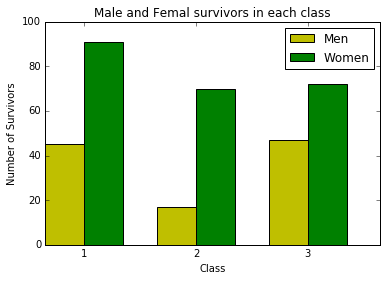

In [139]:
#Plotting the male and female passengers who survived
fig, ax = plt.subplots(1,1)
index = np.arange(male_survivors.count())
    #male survivors count = 3 because there are 3 classes
bar_width = 0.35
#Setting up bar charts
ax.bar(index, male_survivors,bar_width, color = "y", label = "Men")
ax.bar(index+bar_width, female_survivors,bar_width, color = "g", label = "Women")

xTickmarks = male_survivors.index.values.tolist()
ax.set_xticks(index+bar_width)
xtickNames = ax.set_xticklabels(xTickmarks)
plt.legend()
ax.set_title("Male and Femal survivors in each class")
plt.ylabel("Number of Survivors")
plt.xlabel("Class")

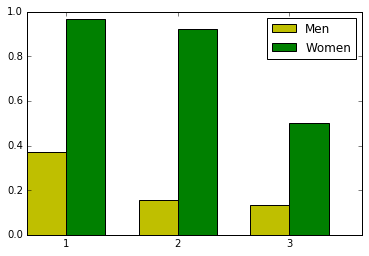

In [155]:
#Plotting the percentage of survivors in each class

fig, ax = plt.subplots(1,1)
index = np.arange(male_survivors.count())
bar_width = 0.35

ax.bar(index, male_survivor_percent, bar_width,color = "y", label = "Men")
ax.bar(index+bar_width, female_survivor_percent, bar_width, color = "g", label = "Women")
ax.legend()

xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index+ bar_width)
xTickNames = ax.set_xticklabels(xTickMarks)

In [145]:
# Takeaways
# 1. More women than men survived. 90% of women in 1st and 2nd class survived
# the accident.

array([0, 1, 2])

In [178]:
#What is the distribution of non-survivors among the various classes 
#who have family aboard the ship.

#Sibsp = shows the number of siblings or spouses aboard the ship.
#parch = shows the number of parents or children aboard

#Checking for null entries
print(df['SibSp'].isnull().value_counts())
print(df['Parch'].isnull().value_counts())
#None of the entries have null values

#Total number of survivors in each class
nonsurvivors_withfamily = df[(df['SibSp']>0) | (df['Parch']>0) & (df['Survived'] == 0)].groupby('Pclass')["Survived"].count()

#Total number of passengers in each class
total_passengers = df.groupby('Pclass')["PassengerId"].count()

nonsurvivor_withfamily_percent = nonsurvivors_withfamily/total_passengers
nonsurvivor_withfamily_percent

False    891
Name: SibSp, dtype: int64
False    891
Name: Parch, dtype: int64


Pclass
1    0.407407
2    0.358696
3    0.311609
dtype: float64

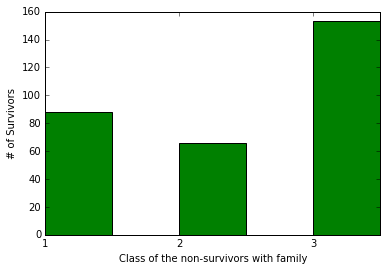

In [180]:
#Plotting number of non survivors who had family
fig,ax = plt.subplots(1,1)
x = nonsurvivors_withfamily.index.values.tolist()
ax.bar(x, nonsurvivors_withfamily, color = "g", width = 0.5)
xtickmarks = x
ax.set_xticks(xtickmarks)
ax.set_xlabel("Class of the non-survivors with family")
ax.set_ylabel("# of Survivors")
xticknames = ax.set_xticklabels(xtickmarks)


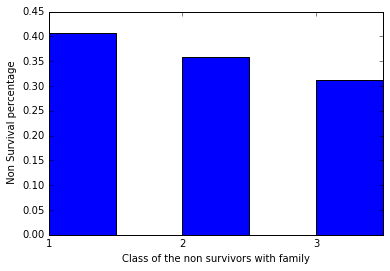

In [186]:
#Plotting % of non survivors
fig, ax = plt.subplots(1,1)
x = nonsurvivors_withfamily.index.values.tolist()
ax.bar (x, nonsurvivor_withfamily_percent, color = "b", width = 0.5)
xtickmarks = x
ax.set_xticks(xtickmarks)
ax.set_xlabel("Class of the non survivors with family")
ax.set_ylabel(" Non Survival percentage")
        

In [187]:
#What is the survival percentage among different age groups

#Checking for null values
df["Age"].isnull().value_counts()
#In this case we have some entries that do not have values

False    714
True     177
Name: Age, dtype: int64

In [207]:
#My thought process
#Removing the rows that did not have any age.
dfnew = df[df.Age.notnull()]

age_bin = [0,18,25,40,60,100] #Age binning interval


#creating the bins
dfnew["AgeBin"] = pd.cut(dfnew.Age, bins = age_bin)
    #pandas to split the data into bings given by age_bin
survivors = dfnew.groupby('AgeBin')["Survived"].sum()
total_passengers = dfnew.groupby("AgeBin")["Survived"].count()

perage_survival = survivors/total_passengers
perage_survival


/home/animo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


AgeBin
(0, 18]      0.503597
(18, 25]     0.333333
(25, 40]     0.422053
(40, 60]     0.390625
(60, 100]    0.227273
Name: Survived, dtype: float64

In [211]:
#Books way
age_bin = [0,18,25,40, 60, 100]

#creating the bins
df["AgeBin"] = pd.cut(df.Age, bins = age_bin)

#Removing the null rows
d_temp = df[np.isfinite(df["Age"])] #removing all na insntance

#Number of survivors based on Age Bin
survivors = d_temp.groupby("AgeBin")["Survived"].sum()

#Total passengers in each list
total_passengers = d_temp.groupby('AgeBin')["Survived"].count()

#percent survival per group
survival_per_age_group = survivors/total_passengers
survival_per_age_group

AgeBin
(0, 18]      0.503597
(18, 25]     0.333333
(25, 40]     0.422053
(40, 60]     0.390625
(60, 100]    0.227273
Name: Survived, dtype: float64

([<matplotlib.patches.Wedge at 0x7ff42ff7aef0>,
  <matplotlib.text.Text at 0x7ff42ff27668>])

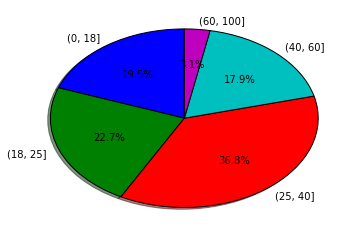

In [223]:
#Plotting pie charts
x=total_passengers.index.values.categories
plt.pie(total_passengers, labels = x, autopct ='%1.1f%%', shadow= True, startangle = 90)

plt.title("Total Passengers in different age group")

([<matplotlib.patches.Wedge at 0x7ff42fe6c668>,
  <matplotlib.text.Text at 0x7ff42fe15da0>])

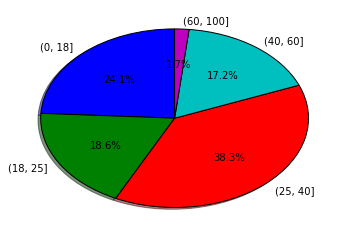

In [225]:
#plotting the piechart of survival percent
plt.pie(survivors, labels= x, autopct = '%1.1f%%', shadow= True,startangle =90 )